In [1]:
import sys 
import os
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
from dotenv import load_dotenv
from scipy.stats import zscore
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from IPython.display import display
from scripts.User_overview_analysis import TelecomDataAnalysis
from scripts.load_from_postgres import fetch_data_from_postgres
warnings.filterwarnings(
    "ignore", category = FutureWarning

)


In [3]:
query = "SELECT * FROM"
table_name = 'xdr_data'
data = fetch_data_from_postgres(query, table_name)

Connection successful!


c:\Users\Ashis\Desktop\KAIM Program 2\week2\scripts\load_from_postgres.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(full_query, conn)


Data imported successfully!


In [4]:
analyzer = TelecomDataAnalysis(data)

Preprocessing data:
Missing values before handling:
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%) 

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     


Creating user aggregates:

Analyzing top users:
Top 10 users by Total Data:


,MSISDN/Number,Total Data (MB)
13467,3.362632e+10,244251.214967
6404,3.361489e+10,8436.419004
92584,3.376054e+10,8120.321239
13123,3.362578e+10,8105.869982
76077,3.367588e+10,7525.549515
36909,3.365973e+10,7348.883422
62804,3.366646e+10,6969.929636
92239,3.376041e+10,6801.958574
57032,3.366471e+10,6553.667267
86138,3.369879e+10,6237.887503



Top 10 users by Session Count:


,MSISDN/Number,Session Count
13467,3.362632e+10,511
6404,3.361489e+10,17
13123,3.362578e+10,17
36909,3.365973e+10,16
76077,3.367588e+10,15
92584,3.376054e+10,15
64883,3.366716e+10,13
658,3.360313e+10,12
1270,3.360452e+10,12
13934,3.362708e+10,12



Top 10 users by Total Duration:


,MSISDN/Number,Total Duration (min)
13467,3.362632e+10,581.973729
36909,3.365973e+10,60.737096
76077,3.367588e+10,50.599335
57032,3.366471e+10,48.796417
60123,3.366553e+10,45.052280
35296,3.365936e+10,39.926363
75921,3.367557e+10,38.569463
6404,3.361489e+10,37.691072
92584,3.376054e+10,37.199183
39181,3.366027e+10,35.886276



Analyzing user engagement:
User Engagement Statistics:


,Total Data (MB),Session Count,Total Duration (min)
count,106470.000000,106470.000000,106470.000000
mean,661.713284,1.399446,2.310861
std,881.241699,1.757219,2.726336
min,31.708726,1.000000,0.119033
25%,342.198043,1.000000,1.206646
50%,589.695402,1.000000,1.718942
75%,818.127416,2.000000,2.879967
max,244251.214967,511.000000,581.973729


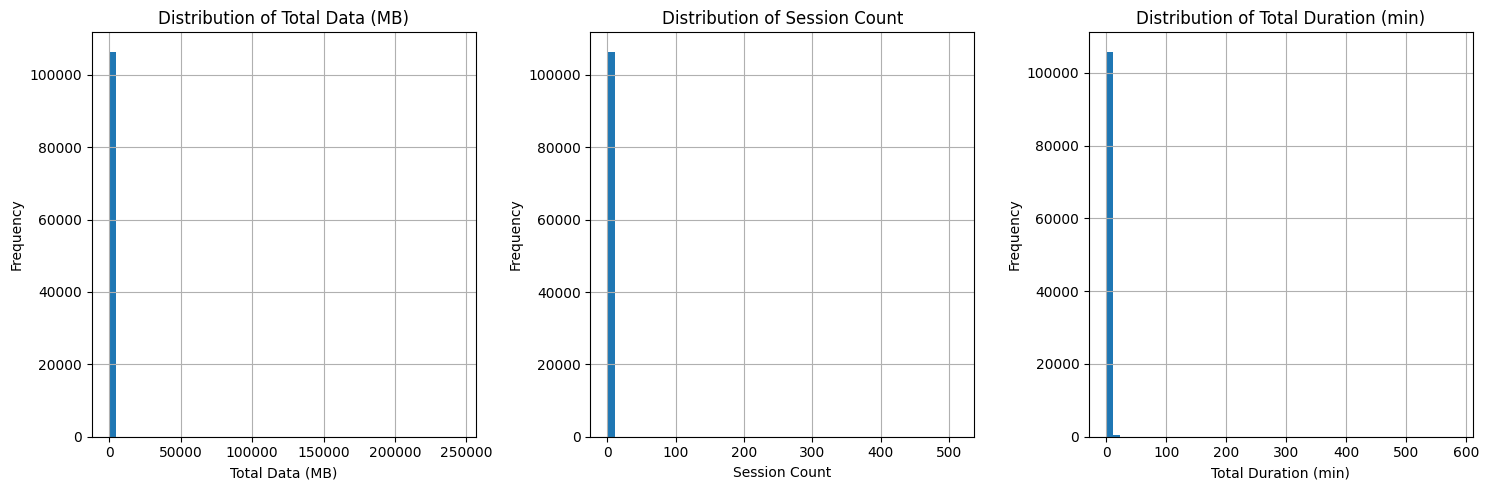


Analyzing app usage:
Application Usage Statistics:


Gaming DL (MB)          5.997738e+07
Other DL (MB)           5.984272e+07
Youtube DL (MB)         1.653014e+06
Netflix DL (MB)         1.652001e+06
Youtube UL (MB)         1.564410e+06
Netflix UL (MB)         1.563447e+06
Gaming UL (MB)          1.177979e+06
Other UL (MB)           1.174151e+06
Google DL (MB)          8.172652e+05
Google UL (MB)          2.922280e+05
Social Media DL (MB)    2.550948e+05
Email DL (MB)           2.545834e+05
Email UL (MB)           6.641798e+04
Social Media UL (MB)    4.678547e+03
dtype: float64

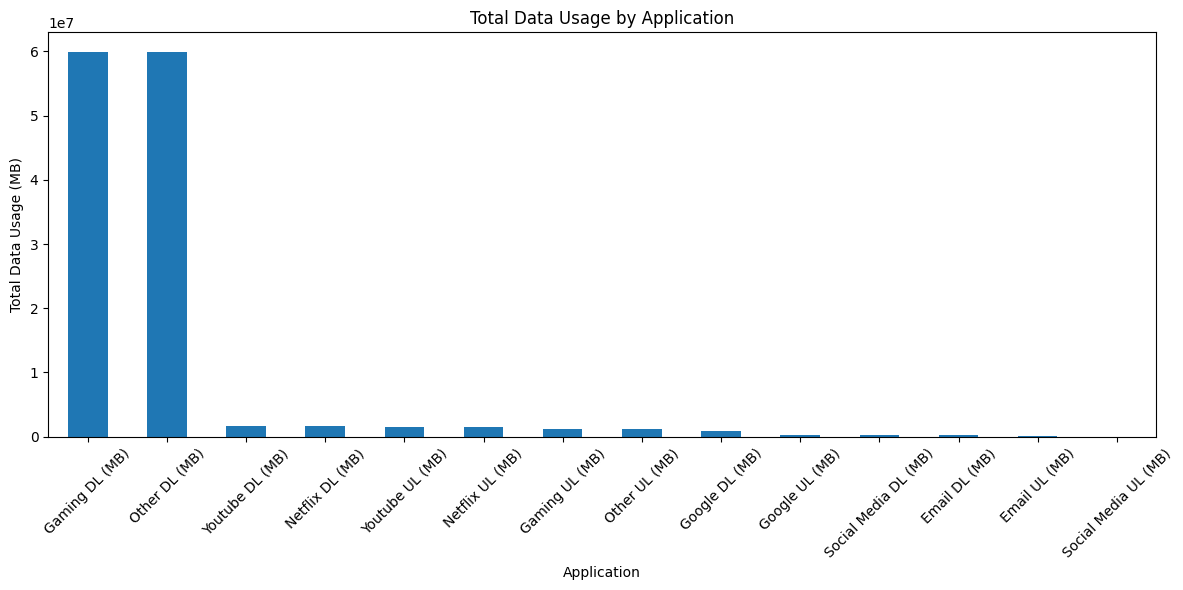


Top 10 Handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
undefined                        8960
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: count, dtype: int64


Top 3 Manufacturers:


Handset Manufacturer
Apple      59440
Samsung    40689
Huawei     34353
Name: count, dtype: int64


Top Handsets per Manufacturer:

Apple:


Handset Type
Apple iPhone 6S (A1688)    9401
Apple iPhone 6 (A1586)     9004
Apple iPhone 7 (A1778)     6301
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: count, dtype: int64


Samsung:


Handset Type
Samsung Galaxy S8 (Sm-G950F)    4504
Samsung Galaxy A5 Sm-A520F      3716
Samsung Galaxy J5 (Sm-J530)     3689
Samsung Galaxy J3 (Sm-J330)     3476
Samsung Galaxy S7 (Sm-G930X)    3194
Name: count, dtype: int64


Huawei:


Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2015
Huawei P20                         1476
Huawei Y6 2018                      996
Name: count, dtype: int64


User Segmentation:


Decile
0    1.099479e+07
1    1.181744e+07
2    1.106951e+07
3    1.314472e+07
4    2.342615e+07
Name: Total Data (MB), dtype: float64


Basic Metrics:


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
count,1.489990e+05,148999.000000,148999.000000,148999.000000,1.489990e+05,1.489990e+05,1.489990e+05,148999.000000,148999.000000,148999.000000,...,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05,1.489990e+05
mean,1.013900e+19,499.150800,498.691125,99076.099669,2.082017e+14,3.369578e+10,4.847996e+13,71.702837,11.439842,11321.289972,...,1.100949e+07,1.162591e+07,1.100271e+07,4.220890e+08,8.289989e+06,4.211413e+08,8.263052e+06,4.112189e+07,4.546863e+08,4.958082e+08
std,2.893161e+18,288.626299,288.093531,60048.694788,1.338856e+09,8.195295e+09,2.242007e+13,116.923304,19.492794,18878.537707,...,6.345386e+06,6.724866e+06,6.358546e+06,2.439958e+08,4.781881e+06,2.431725e+08,4.768225e+06,1.125721e+07,2.441690e+08,2.444056e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.082001e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.324119e+06,7.114041e+06,2.895611e+07
25%,7.349883e+18,250.000000,251.000000,58008.500000,2.082014e+14,3.365100e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.517999e+06,5.777630e+06,5.477385e+06,2.105547e+08,4.131108e+06,2.103205e+08,4.144875e+06,3.322763e+07,2.431687e+08,2.845795e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366366e+10,3.572211e+13,45.000000,5.000000,63.000000,...,1.101199e+07,1.163969e+07,1.099954e+07,4.234924e+08,8.291736e+06,4.218030e+08,8.266810e+06,4.113715e+07,4.559921e+08,4.969558e+08
75%,1.304243e+19,749.000000,749.000000,128342.500000,2.082018e+14,3.368331e+10,8.611970e+13,61.000000,11.000000,16922.000000,...,1.651522e+07,1.746872e+07,1.650559e+07,6.332611e+08,1.243257e+07,6.316699e+08,1.237930e+07,4.902687e+07,6.657571e+08,7.066209e+08
max,1.318654e+19,999.000000,999.000000,348152.000000,2.082522e+14,3.197021e+12,9.900120e+13,1682.000000,245.000000,85334.000000,...,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08,9.526413e+08



Descriptive Statistics:


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb


Dispersion Parameters:


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
std,2.893161e+18,288.626299,288.093531,6.004869e+04,1.338856e+09,8.195295e+09,2.242007e+13,116.923304,19.492794,1.887854e+04,...,6.345386e+06,6.724866e+06,6.358546e+06,2.439958e+08,4.781881e+06,2.431725e+08,4.768225e+06,1.125721e+07,2.441690e+08,2.444056e+08
var,8.370378e+36,83305.140651,82997.882864,3.605846e+09,1.792534e+18,6.716286e+19,5.026594e+26,13671.058922,379.969013,3.563992e+08,...,4.026393e+13,4.522382e+13,4.043111e+13,5.953397e+16,2.286639e+13,5.913288e+16,2.273597e+13,1.267248e+14,5.961850e+16,5.973410e+16
skew,2.660285e-02,0.000950,-0.000945,1.146905e+00,5.487183e+00,3.859785e+02,1.070670e+00,7.179980,5.114639,1.760835e+00,...,-8.798879e-04,-2.196451e-03,-4.278422e-04,-3.863930e-03,-2.206660e-03,1.121948e-03,1.538709e-03,-2.160987e-03,-3.551130e-03,-2.872395e-03
kurt,-1.995165e+00,-1.197705,-1.199303,1.735044e+00,4.238920e+01,1.489860e+05,-7.132347e-01,66.030629,37.067719,2.273940e+00,...,-1.198360e+00,-1.205252e+00,-1.202429e+00,-1.203365e+00,-1.202247e+00,-1.196663e+00,-1.191711e+00,-3.434740e-01,-1.198408e+00,-1.193064e+00



Bivariate Analysis:


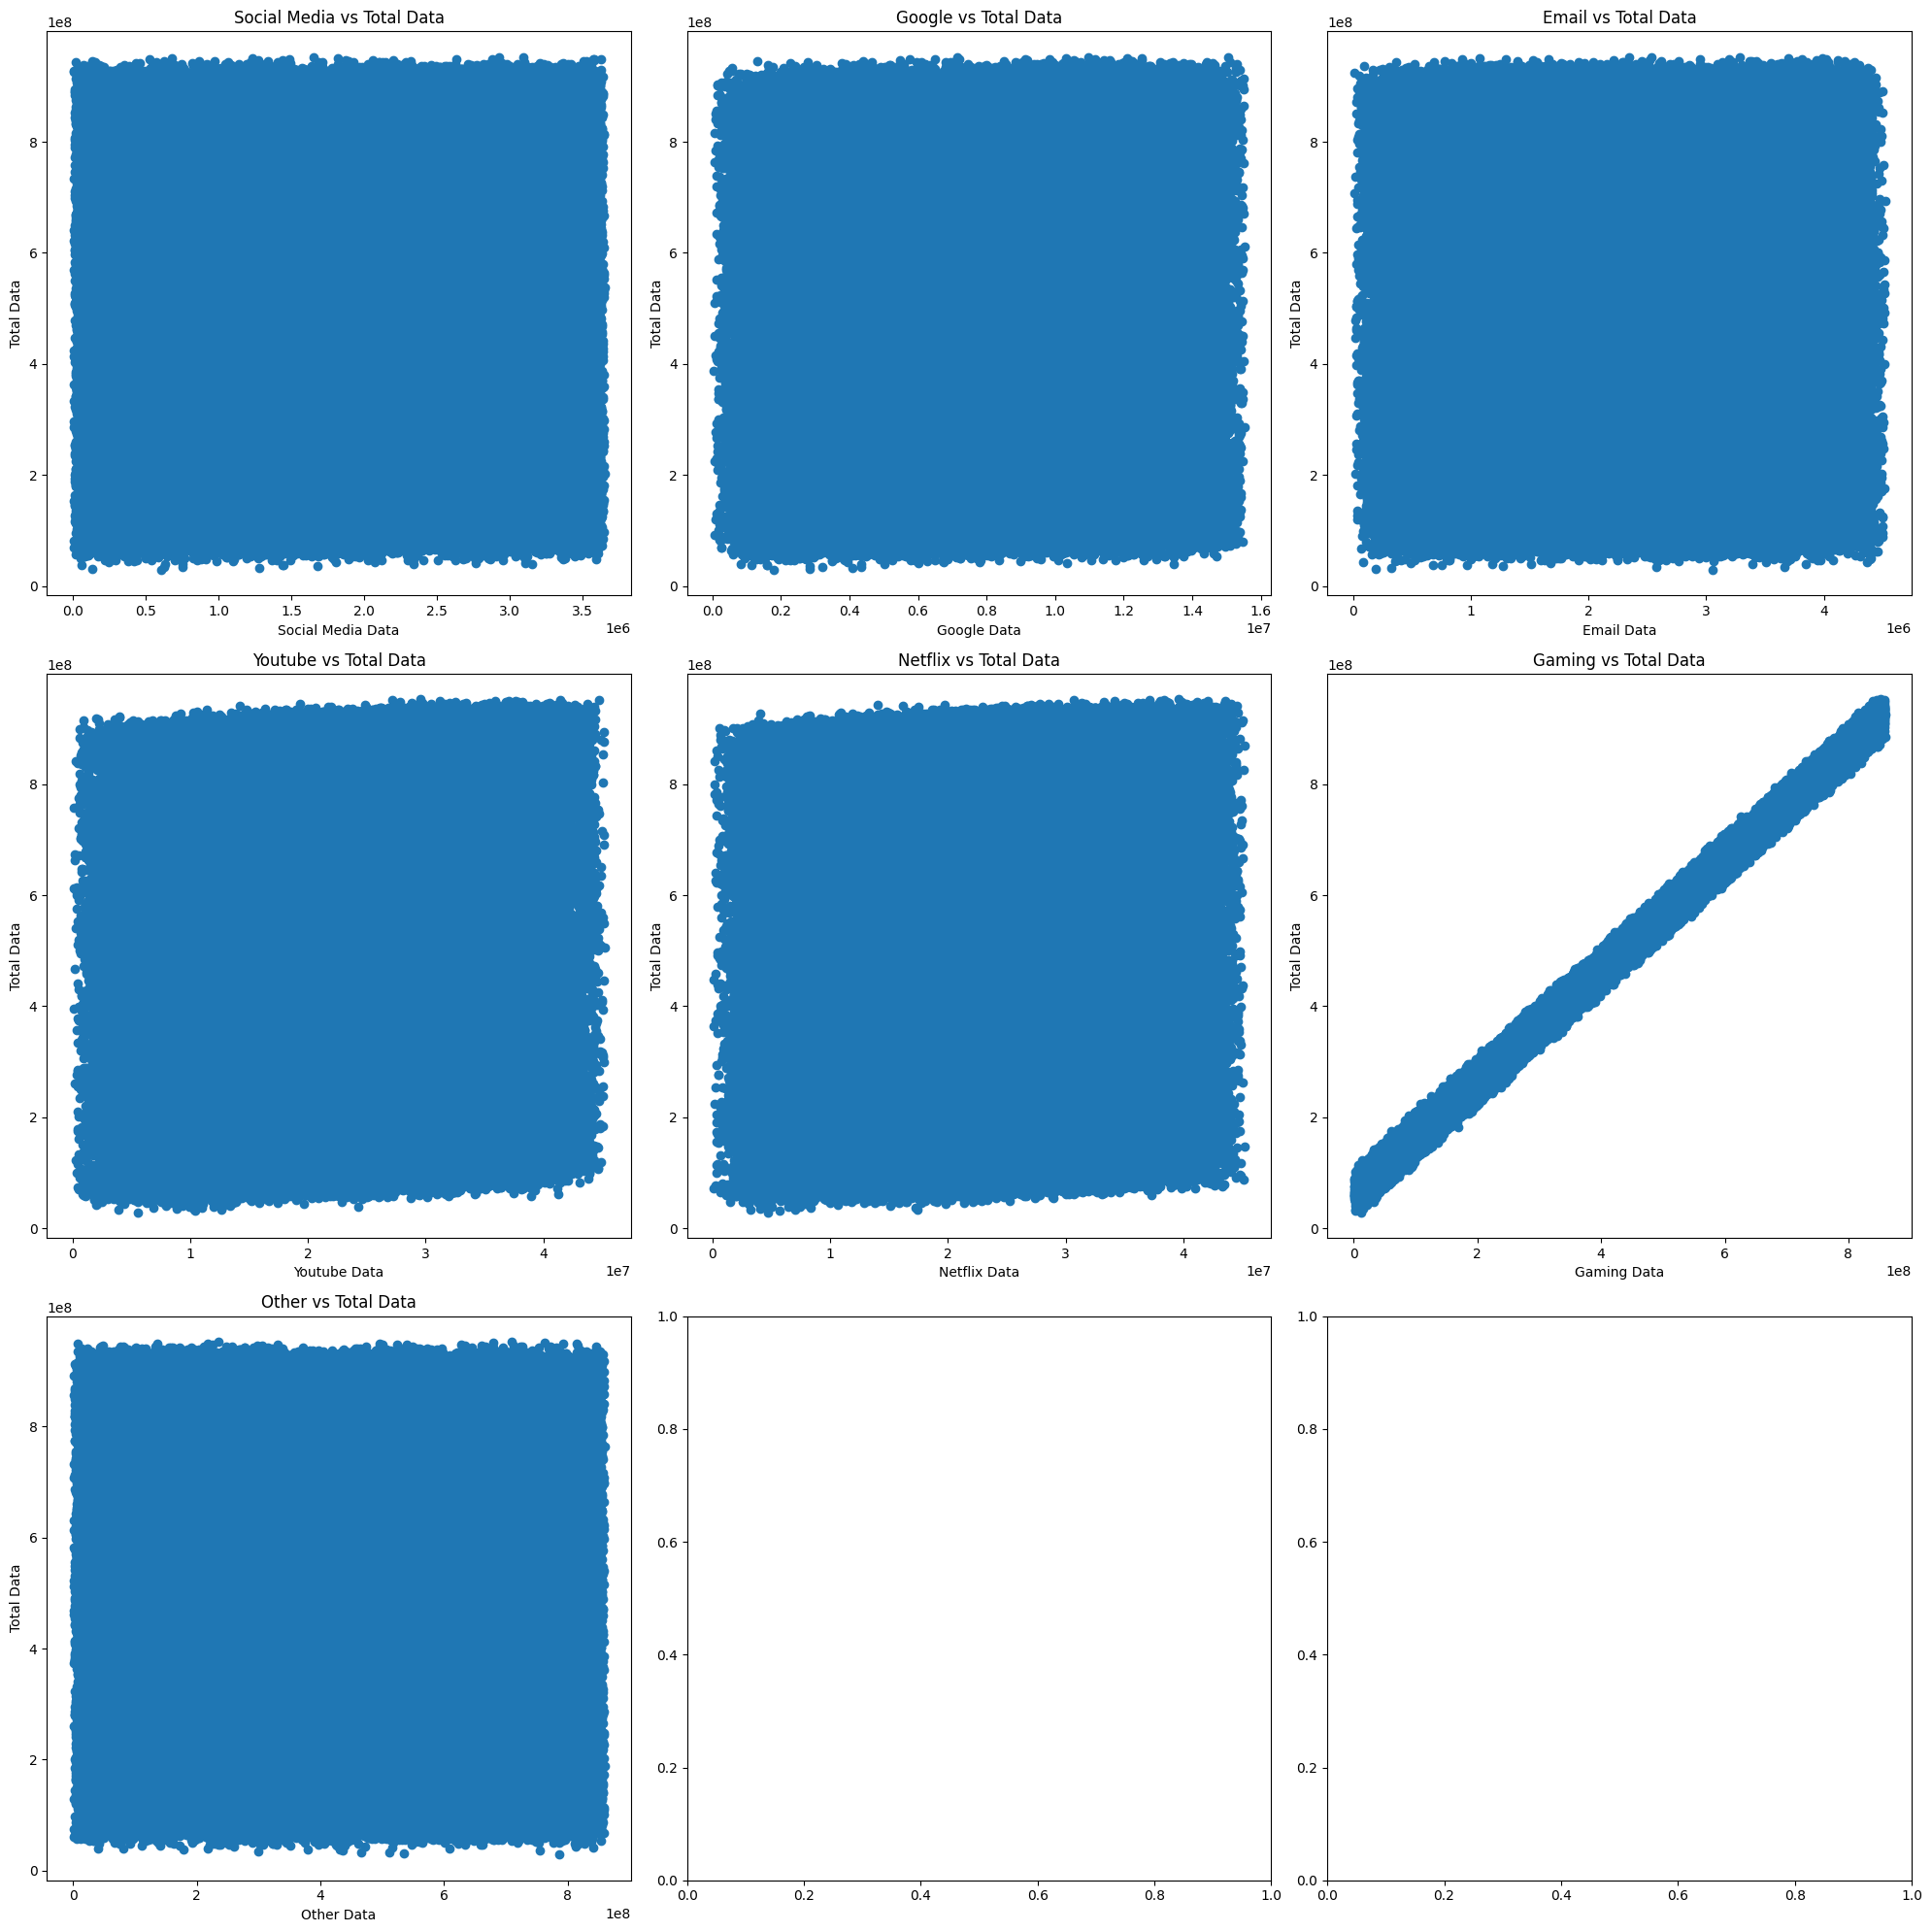


Correlation Analysis:


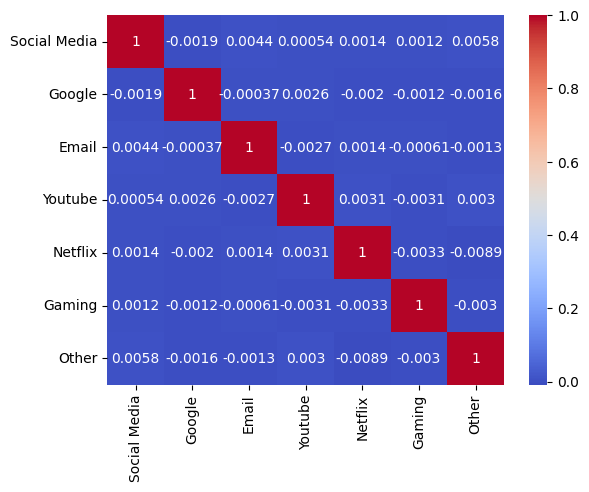

,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
Social Media,1.000000,-0.001935,0.004378,0.000536,0.001353,0.001198,0.005773
Google,-0.001935,1.000000,-0.000366,0.002588,-0.002036,-0.001155,-0.001633
Email,0.004378,-0.000366,1.000000,-0.002708,0.001368,-0.000614,-0.001264
Youtube,0.000536,0.002588,-0.002708,1.000000,0.003128,-0.003093,0.002986
Netflix,0.001353,-0.002036,0.001368,0.003128,1.000000,-0.003322,-0.008885
Gaming,0.001198,-0.001155,-0.000614,-0.003093,-0.003322,1.000000,-0.002963
Other,0.005773,-0.001633,-0.001264,0.002986,-0.008885,-0.002963,1.000000



Univariate Analysis:


c:\Users\Ashis\Desktop\KAIM Program 2\week2\scripts\User_overview_analysis.py:248: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  self.user_aggregates[columns].hist(bins=50, ax=ax)


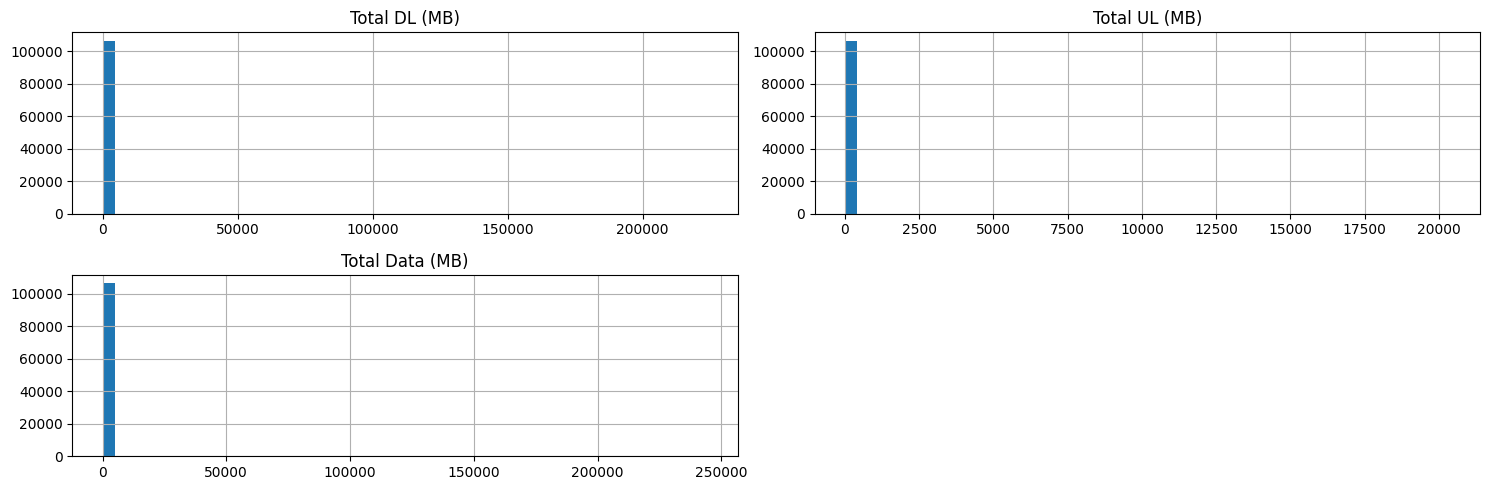

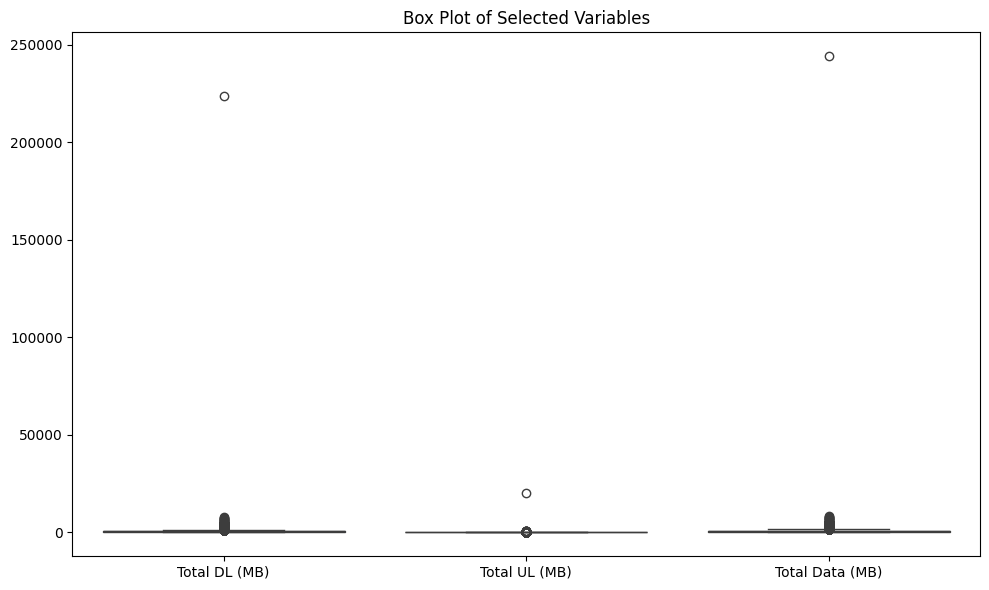


Performing PCA:
PCA Results:
Explained variance ratio: [0.90545134 0.0789758 ]


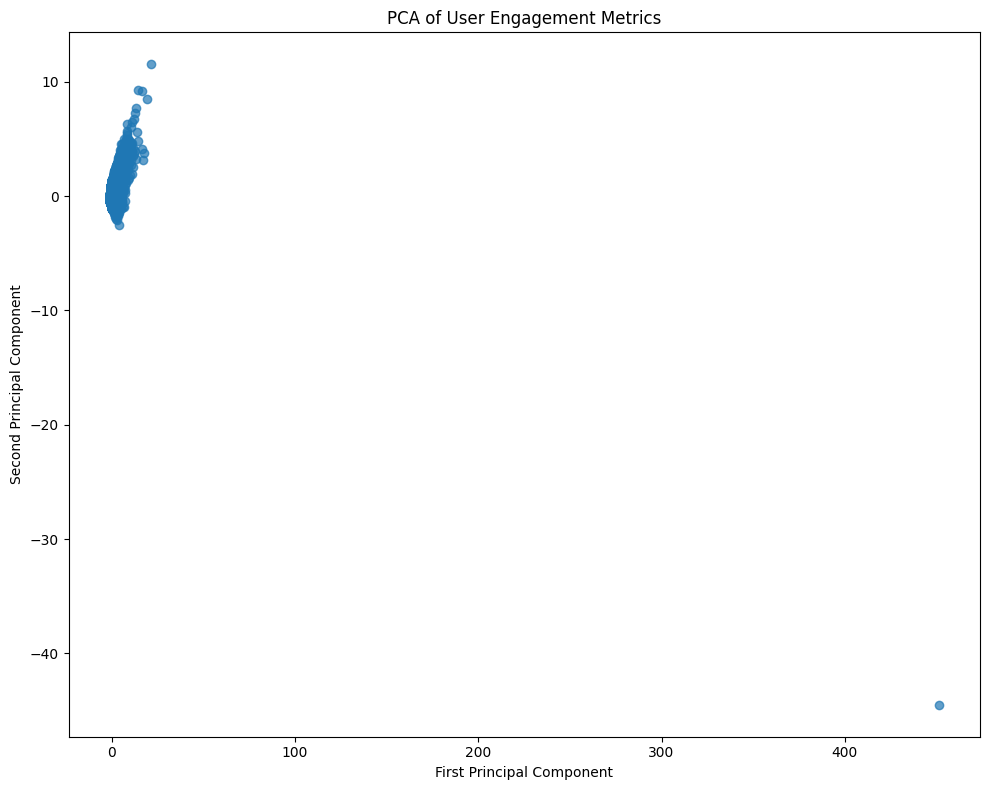

In [5]:
analyzer.run_analysis()